1. Setting Up the Environment
✅ Tools You'll Need:
Python 3.8 or above — The primary language for this project.
Jupyter Notebook or Google Colab — Ideal for data science projects because of their interactive nature.
Libraries to Install:
pandas → For data handling.
numpy → For numerical operations.
nltk → For text preprocessing.
gensim → For Word2Vec embeddings.
transformers → To use Hugging Face models.
sklearn → For evaluation metrics.
💻 Installing Libraries:
If you're using Google Colab, run this in the first cell:

!pip install pandas numpy nltk gensim transformers scikit-learn

In [1]:
pip install pandas

In [2]:
!pip install pandas numpy nltk gensim transformers scikit-learn matplotlib wordcloud


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from transformers import pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

 2. Getting the Dataset
Go to Kaggle: NLP Getting Started Dataset
Sign in and Join the Competition (if needed).
Download the train.csv file.
Upload it to your Colab/Jupyter Notebook.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


3. Understanding the Dataset
The CSV file has the following columns:

id — Unique identifier for each tweet.
text — The tweet itself.
target — 1 if it's a disaster tweet, 0 otherwise.
To view the data:

In [5]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('train.csv')

# View the first 5 rows
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


4. Data Preprocessing (Cleaning the Tweets)
Tweets are messy! They contain URLs, emojis, mentions, etc. We need to clean them.

✅ Steps to Clean Data:
Remove URLs, mentions, and hashtags.
Convert text to lowercase.
Remove punctuation and stopwords.
Lemmatize words (reduce them to their root form).
Code Example:

In [7]:
import nltk

# Force download punkt_tab
nltk.download('punkt')
nltk.download('punkt_tab')

# Verify if it's installed
nltk.data.find('tokenizers/punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


FileSystemPathPointer('/root/nltk_data/tokenizers/punkt')

In [8]:
# Apply the cleaning function again
data['cleaned_text'] = data['text'].apply(clean_text)

# Check cleaned data
data[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,ourdeedsarethereasonofthisearthquakemayallahfo...
1,Forest fire near La Ronge Sask. Canada,forestfirenearlarongesaskcanada
2,All residents asked to 'shelter in place' are ...,allresidentsaskedtoshelterinplacearebeingnotif...
3,"13,000 people receive #wildfires evacuation or...",peoplereceivewildfiresevacuationordersincalifo...
4,Just got sent this photo from Ruby #Alaska as ...,justgotsentthisphotofromrubyalaskaassmokefromw...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cleaned_text'].value_counts()
    for x_label, grp in _df_2.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('cleaned_text')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cleaned_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='cleaned_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cleaned_text'].value_counts()
    for x_label, grp in _df_9.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('cleaned_text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['cleaned_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='index', y='cleaned_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 Step 6: Clean the Tweets
Now, let's clean the data using NLTK:

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\\S+', '', text)  # Remove URLs
    text = re.sub(r'@\\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)         # Remove hashtags
    text = re.sub(r'[^A-Za-z\\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)

# Check cleaned data
data[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,ourdeedsarethereasonofthisearthquakemayallahfo...
1,Forest fire near La Ronge Sask. Canada,forestfirenearlarongesaskcanada
2,All residents asked to 'shelter in place' are ...,allresidentsaskedtoshelterinplacearebeingnotif...
3,"13,000 people receive #wildfires evacuation or...",peoplereceivewildfiresevacuationordersincalifo...
4,Just got sent this photo from Ruby #Alaska as ...,justgotsentthisphotofromrubyalaskaassmokefromw...


 Step 7: Word Embedding with Word2Vec
Let’s create word embeddings:

In [12]:
# View all words in the vocabulary
vocab = list(word2vec_model.wv.index_to_key)
print("Vocabulary Size:", len(vocab))
print("Sample words:", vocab[:20])  # Show first 20 words



Vocabulary Size: 7472
Sample words: ['yearoldboychargedwithmanslaughteroftoddlerreportanyearoldboyhasbeenchargedwithmanslaughteroverthefatalsh', 'blackeyeaspacebattleoccurredatstaroinvolvingfleetstotalingshipswithdestroyed', 'thathorriblesinkingfeelingwhenyouvebeenathomeonyourphoneforawhileandyourealiseitsbeenongthiswholetime', 'bestnaijamadeyroldpkksuicidebomberwhodetonatedbombinhttptcoksawlyuxbestnaijamadebestnaijamadebestnaijamadebe', 'hecametoalandwhichwasengulfedintribalwarandturneditintoalandofpeaceiemadinahprophetmuhammadislam', 'theprophetpeacebeuponhimsaidsaveyourselffromhellfireevenifitisbygivinghalfadateincharity', 'onedirectionismypickforhttptcoqeblokevefanarmydirectionershttptcoencmhzyx', 'madhyapradeshtrainderailmentvillageyouthsavedmanylives', 'videowerepickingupbodiesfromwaterrescuersaresearchingforhundredsofmigrantsinthemediterraneanafteraboatcarryi', 'tofightbioterrorismsir', 'beyonceismypickforhttptcothoyhrhkfjfanarmybeyhivehttptcowvjabgm', 'potusstrategicpatienceisa

In [14]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = nltk.word_tokenize(text)  # Proper tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join tokens with spaces


In [15]:
# Apply the updated cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)

# Verify cleaned data
data[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...


In [16]:
# Tokenize the cleaned text
tokenized_sentences = [nltk.word_tokenize(text) for text in data['cleaned_text']]

# Rebuild Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Check the updated vocabulary
vocab = list(word2vec_model.wv.index_to_key)
print("Updated Vocabulary Size:", len(vocab))
print("Sample words:", vocab[:20])


Updated Vocabulary Size: 13291
Sample words: ['fire', 'like', 'im', 'amp', 'u', 'get', 'new', 'via', 'dont', 'one', 'people', 'news', 'time', 'video', 'emergency', 'disaster', 'body', 'year', 'day', 'police']


In [17]:
if 'fire' in word2vec_model.wv.key_to_index:
    print(word2vec_model.wv.most_similar('fire'))
else:
    print("'fire' is still not in the vocabulary. Try another common word from the dataset.")


[('amp', 0.9987021088600159), ('one', 0.9986774325370789), ('people', 0.9984533190727234), ('time', 0.9984480738639832), ('u', 0.9984095096588135), ('new', 0.998404324054718), ('news', 0.9984027743339539), ('like', 0.9983576536178589), ('via', 0.9982417225837708), ('emergency', 0.9982256293296814)]


In [18]:
# Find words similar to 'fire'
print("Words similar to 'fire':")
print(word2vec_model.wv.most_similar('fire'))


Words similar to 'fire':
[('amp', 0.9987021088600159), ('one', 0.9986774325370789), ('people', 0.9984533190727234), ('time', 0.9984480738639832), ('u', 0.9984095096588135), ('new', 0.998404324054718), ('news', 0.9984027743339539), ('like', 0.9983576536178589), ('via', 0.9982417225837708), ('emergency', 0.9982256293296814)]


In [19]:
def clean_text_improved(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags
    text = re.sub(r'&amp;', 'and', text)  # Fix HTML entities
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply improved cleaning
data['cleaned_text'] = data['text'].apply(clean_text_improved)


In [20]:
# Tokenize cleaned text again
tokenized_sentences = [nltk.word_tokenize(text) for text in data['cleaned_text']]

# Rebuild Word2Vec with new params
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=200, window=10, min_count=1, workers=4)

# Check 'fire' similarities again
if 'fire' in word2vec_model.wv.key_to_index:
    print("Words similar to 'fire':", word2vec_model.wv.most_similar('fire'))
else:
    print("'fire' is still missing. Try another word.")


Words similar to 'fire': [('u', 0.9997902512550354), ('one', 0.9997783899307251), ('time', 0.999775767326355), ('new', 0.9997693300247192), ('via', 0.999768853187561), ('like', 0.9997649788856506), ('news', 0.9997605681419373), ('people', 0.9997565746307373), ('day', 0.9997548460960388), ('emergency', 0.9997532963752747)]


In [21]:
import gensim.downloader as api

# Load pre-trained GloVe embeddings
glove_vectors = api.load("glove-wiki-gigaword-100")

# Check similar words to 'fire'
print(glove_vectors.most_similar('fire'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('fires', 0.7522280216217041), ('fired', 0.7405155897140503), ('firing', 0.7302654981613159), ('attack', 0.7193385362625122), ('explosion', 0.7003914713859558), ('blast', 0.6938597559928894), ('blaze', 0.6863822340965271), ('police', 0.6835577487945557), ('ground', 0.6762129664421082), ('destroyed', 0.6756625771522522)]


📌 Step 1: Install Hugging Face Transformers (if not already installed)

In [22]:
!pip install transformers


 Step 2: Import the Zero-Shot Classification Pipeline

In [23]:
from transformers import pipeline

# Load Hugging Face zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


📌 Step 3: Test Zero-Shot on a Single Tweet

In [24]:
# Example tweet
tweet = "A massive fire broke out downtown, and emergency services are on the scene."

# Candidate labels
labels = ["disaster", "non-disaster"]

# Apply zero-shot classification
result = classifier(tweet, labels)

# Display result
print("Label:", result['labels'][0])
print("Scores:", result['scores'])


Label: disaster
Scores: [0.9839117527008057, 0.016088252887129784]


 Step 4: Apply Zero-Shot to the Entire Dataset

In [25]:
def zero_shot_classify(text):
    labels = ["disaster", "non-disaster"]
    result = classifier(text, labels)
    return result['labels'][0]  # Get the top label

# Apply classification to each tweet
data['predicted'] = data['text'].apply(zero_shot_classify)

# View some predictions
data[['text', 'predicted']].head()


KeyboardInterrupt: 

In [26]:
# Sample 500 tweets for faster processing
sample_data = data.sample(n=500, random_state=42).copy()

# Apply Zero-Shot Classification on the sample
sample_data['predicted'] = sample_data['text'].apply(zero_shot_classify)

# Evaluate on the sample
from sklearn.metrics import accuracy_score
sample_data['predicted_binary'] = sample_data['predicted'].apply(lambda x: 1 if x == 'disaster' else 0)
accuracy = accuracy_score(sample_data['target'], sample_data['predicted_binary'])
print(f"Sample Accuracy: {accuracy * 100:.2f}%")


Sample Accuracy: 58.00%


In [27]:
import torch
print("GPU available:", torch.cuda.is_available())


GPU available: False


In [28]:
from tqdm import tqdm  # For progress bar

def batch_zero_shot_classify(texts, batch_size=8):
    labels = ["disaster", "non-disaster"]
    predictions = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        results = classifier(batch.tolist(), labels)
        for res in results:
            predictions.append(res['labels'][0])
    return predictions

# Apply batched classification
data['predicted'] = batch_zero_shot_classify(data['text'].values)


100%|██████████| 952/952 [2:17:45<00:00,  8.68s/it]


📊 Step 1: View Predictions

In [29]:
# View first 10 predictions
data[['text', 'predicted']].head(10)


,text,predicted
0,Our Deeds are the Reason of this #earthquake M...,disaster
1,Forest fire near La Ronge Sask. Canada,disaster
2,All residents asked to 'shelter in place' are ...,non-disaster
3,"13,000 people receive #wildfires evacuation or...",disaster
4,Just got sent this photo from Ruby #Alaska as ...,disaster
5,#RockyFire Update => California Hwy. 20 closed...,disaster
6,#flood #disaster Heavy rain causes flash flood...,disaster
7,I'm on top of the hill and I can see a fire in...,disaster
8,There's an emergency evacuation happening now ...,disaster
9,I'm afraid that the tornado is coming to our a...,disaster


✅ Step 2: Evaluate Model Accuracy
Let’s see how well the model performed by comparing its predictions against the actual labels (target column).

Zero-Shot Classification Accuracy: 59.08%

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.42      0.54      4342
           1       0.52      0.81      0.63      3271

    accuracy                           0.59      7613
   macro avg       0.63      0.62      0.59      7613
weighted avg       0.65      0.59      0.58      7613



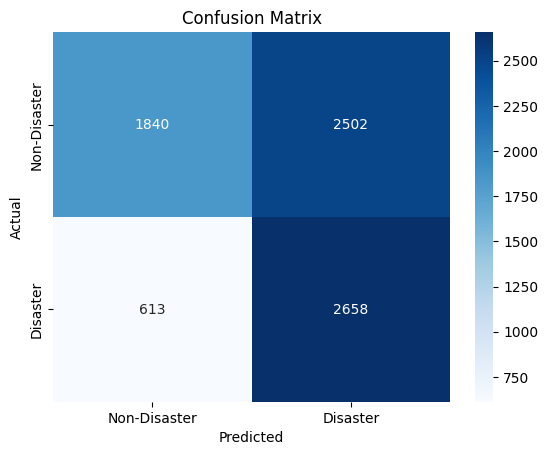

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predictions to binary (1 for disaster, 0 for non-disaster)
data['predicted_binary'] = data['predicted'].apply(lambda x: 1 if x == 'disaster' else 0)

# Calculate accuracy
accuracy = accuracy_score(data['target'], data['predicted_binary'])
print(f"Zero-Shot Classification Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(data['target'], data['predicted_binary']))

# Confusion matrix for visualization
cm = confusion_matrix(data['target'], data['predicted_binary'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


📈 Step 3: Visualize Disaster vs Non-Disaster Tweets
Let’s plot a bar chart to see the distribution of predictions.

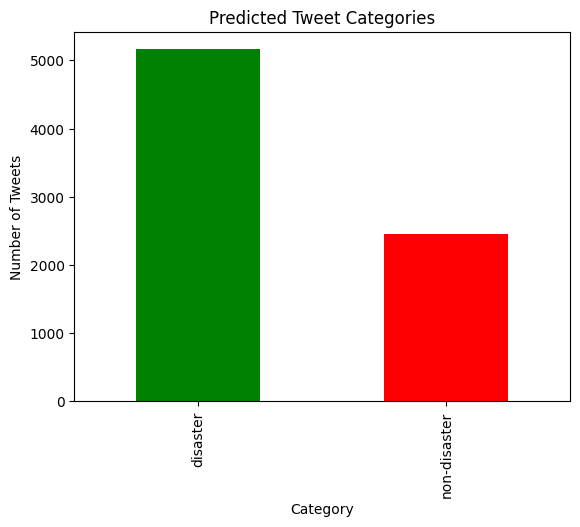

In [31]:
# Count of disaster vs non-disaster predictions
data['predicted'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Predicted Tweet Categories')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.show()
